In [1]:
import simulation as sim

sim.main_exe = '../build/field_u'

fixed_span = sim.Span('../sim_data/fixed_006/')
params = {
    'B': 'XLLP',
    #'I': 50,
    'T': 500,
    's': 100000,
    'S': 'RANDOM',
    'd': 0.3,
    'm': 0,
    'J': 1,
    'K': 1,
    'p': 0.15,
}

xx = range(5,26)

if not fixed_span.runned:
    fixed_span.run('I', xx, **params)

from pprint import pprint
pprint(fixed_span.simulations[0].kwargs, indent=4)

{   'B': 'XLLP',
    'I': '24',
    'J': '1',
    'K': '1',
    'R': '0',
    'S': 'RANDOM',
    'T': '500',
    'd': '0.3',
    'l': '999999999',
    'm': '0',
    'p': '0.15',
    's': '20000',
    'v': '0'}


In [2]:
periodic_span = sim.Span('../sim_data/periodic_014/')
params = {
    'B': 'PLLP',
    'I': 50,
    'T': 500,
    's': 100000,
    'S': 'RANDOM',
    'd': 0.3,
    'm': 0,
    'J': 1,
    'K': 1,
    'p': 0.15,
}

if not periodic_span.runned:
    periodic_span.run('l', xx, **params)

from pprint import pprint
pprint(periodic_span.simulations[0].kwargs, indent=4)

{   'B': 'PLLP',
    'I': '50',
    'J': '1',
    'K': '1',
    'R': '0',
    'S': 'RANDOMO',
    'T': '500',
    'd': '0.3',
    'l': '13',
    'm': '0',
    'p': '0.15',
    's': '10000',
    'v': '0'}


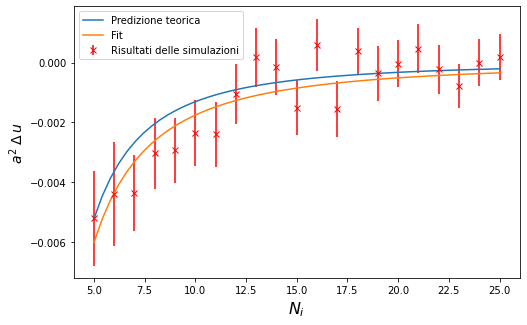

[-0.10545183 -1.77810199] [0.05032426 0.24906524]


In [3]:
# Qua vediamo di quanto scazziamo

import matplotlib.pyplot as plt
import numpy as np

DISCARD = 50
BLOCKSIZE = 4

data = {}
fixed_data = {}
err = {}

for s in fixed_span.simulations:
    data[int(s.kwargs['I'])] =  np.mean(s.data['u'][DISCARD:])
    fixed_data[int(s.kwargs['I'])] =  np.mean(s.data['u'][DISCARD:])
    err[int(s.kwargs['I'])] = sim.bootstrap(s.data['u'][DISCARD:], blocksize=BLOCKSIZE)
for s in periodic_span.simulations:
    data[int(s.kwargs['l'])] -= np.mean(s.data['u'][DISCARD:])
    err[int(s.kwargs['l'])] = np.sqrt(err[int(s.kwargs['l'])]**2 + sim.bootstrap(s.data['u'][DISCARD:], blocksize=BLOCKSIZE)**2)
x_data = []; y_data = []; y_err = []
for x, y in sorted(list(data.items()), key=lambda x: x[0]):
    x_data.append(x); y_data.append(y)
for x, yerr in sorted(list(err.items()), key=lambda x: x[0]):
    y_err.append(yerr)
f_data = []
for x, y in sorted(list(fixed_data.items()), key=lambda x: x[0]):
    f_data.append(y)
#x_data = [ int(s.kwargs['I']) for s in fixed_span.simulations ]
#y_data = [ np.mean(s.data['u'][50:]) for s in fixed_span.simulations ]
#yerr = [ sim.bootstrap(s.data['u'][50:]) for s in fixed_span.simulations ]

plt.figure(figsize=(8,5))

plt.errorbar(x_data, y_data, yerr=y_err, fmt='rx', label='Risultati delle simulazioni')
#plt.errorbar(x_data, f_data, fmt='gx')

def fit_func(x, a, e):
    return a*np.power(x, e)+0
p0 = (-np.pi/24, -2.0)
xxx = np.linspace(5, 25)
yyy = fit_func(xxx, *p0)
plt.plot(xxx, yyy, label='Predizione teorica')

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, x_data, y_data, p0=p0)
plt.plot(xxx, fit_func(xxx, *popt), label='Fit')

plt.ylabel('$a^2\;\Delta \,u$', fontsize=14); plt.xlabel('$N_i$', fontsize=16)
plt.legend()
plt.savefig("fig_result_01.png")
plt.show()
print(popt, np.sqrt(np.diagonal(pcov)))

In [4]:
th_chi2 = np.sum(np.array(y_data - fit_func(x_data, *popt))**2 / np.array(y_err)**2)/(len(x_data)-2)
print("Theoretical reduced chi2:", th_chi2)

Theoretical reduced chi2: 0.7005409404581243
